From paper: The Probabilistic Niche Model Reveals the Niche Structure and Role of Body Size in a Complex Food Web (Williams 2010)

In [2]:
#load all packages before beginning
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
from scipy.sparse import *
from scipy import *
from scipy.sparse.linalg import lsqr
from numpy.linalg import solve, norm
import seaborn as sns #for ploting density dist.
import rank
%matplotlib inline
np.random.seed(1)

# Set printing width of pandas
pd.set_option('max_columns', 150)

In [3]:
Data = pd.read_csv('foodwebs\FoodsWeb_marine\WEB357.csv')
#columns are predators, rows are preys. 

In [4]:
Data.head()

,"Yodzis, P. (1998). Local trophpodynamics and the interaction of marine mammals and fisheries in the Benguela ecosystem. Journal of Animal Ecology. 67, pp. 635-658.",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29
0,Benguela ecosystem - South Atlantic Ocean,phytoplankton,benthic filter-feeders,bacteria,benthic carnivores,microzooplankton,mesozooplankton,macrozooplankton,gelatinous zooplankton,anchovy,pilchard,round herring,lightfish,lanternfish,goby,other pelagics,horse mackerel,chub mackerel,other groundfish,hakes,squid,tunas,snoek,kob,yellowtail,geelbek,whales and dolphins,birds,seals,sharks
1,phytoplankton,0,0,98.8,0,30.6,45,60,25,5,67,0,0,0,36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,benthic filter-feeders,0,0,0,100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,bacteria,0,0,0,0,29.7,0,0,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,benthic carnivores,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0.5,2.2,34.3,0,2.2,22,1.2,8.8,0,1.2,0,0.6,9.6,8


In [5]:
PNM = pd.read_table('foodwebs\PNM foodweb\web3_MLparam_list_v2.txt', sep='\t')

In [6]:
PNM_sorted = PNM.sort_values(by='id')

In [7]:
PNM_sorted.head()

,i,id,n1,c1,r1,cprime1,x1
1,1,1,0.049946,0.000001,0.000000,0.000020,0.000000
3,3,2,0.016724,0.000001,0.000000,0.000060,0.000001
0,0,3,0.032526,0.049946,0.000000,1.535551,0.000000
2,2,4,0.210446,0.016724,0.000000,0.079468,0.000000
4,4,5,0.047308,0.043036,0.036564,0.909679,0.772888


In [8]:
#So A_ij is percentage of j's diet made up of i
A = (Data.values[1:, 1:].astype(np.float))

In [9]:
A

array([[   0. ,    0. ,   98.8,    0. ,   30.6,   45. ,   60. ,   25. ,
           5. ,   67. ,    0. ,    0. ,    0. ,   36. ,    0. ,    0. ,
           0. ,    0. ,    0. ,    0. ,    0. ,    0. ,    0. ,    0. ,
           0. ,    0. ,    0. ,    0. ,    0. ],
       [   0. ,    0. ,    0. ,  100. ,    0. ,    0. ,    0. ,    0. ,
           0. ,    0. ,    0. ,    0. ,    0. ,    0. ,    0. ,    0. ,
           0. ,    0. ,    0. ,    0. ,    0. ,    0. ,    0. ,    0. ,
           0. ,    0. ,    0. ,    0. ,    0. ],
       [   0. ,    0. ,    0. ,    0. ,   29.7,    0. ,    0. ,   25. ,
           0. ,    0. ,    0. ,    0. ,    0. ,    0. ,    0. ,    0. ,
           0. ,    0. ,    0. ,    0. ,    0. ,    0. ,    0. ,    0. ,
           0. ,    0. ,    0. ,    0. ,    0. ],
       [   0. ,    0. ,    0. ,    0. ,    0. ,    0. ,    0. ,    0. ,
           0. ,    0. ,    0. ,    0. ,    0. ,    0. ,    2. ,    0.5,
           2.2,   34.3,    0. ,    2.2,   22. ,    1.2,    8.

In [10]:
out = rank.spring_rank(A)
scores = out[0]
sigma = out[1]

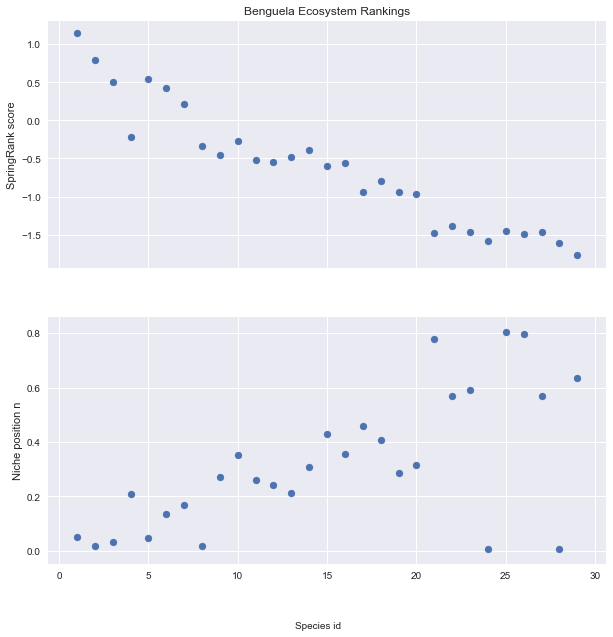

In [14]:
x1 = range(scores.size+1)[1:]
y1 = scores
x2 = PNM_sorted['id']
y2 = PNM_sorted['n1']
f, axarr = plt.subplots(2, sharex=True, figsize=(10,10))
axarr[0].scatter(x1, -y1)
axarr[0].set_title('Benguela Ecosystem Rankings')
axarr[1].scatter(x2, y2)
f.text(0.5, 0.04, 'Species id', ha='center', va='center')
axarr[0].set_ylabel('SpringRank score')
axarr[1].set_ylabel('Niche position n')
# plt.savefig('images/sprank_vs_PNM_Benguela.png')

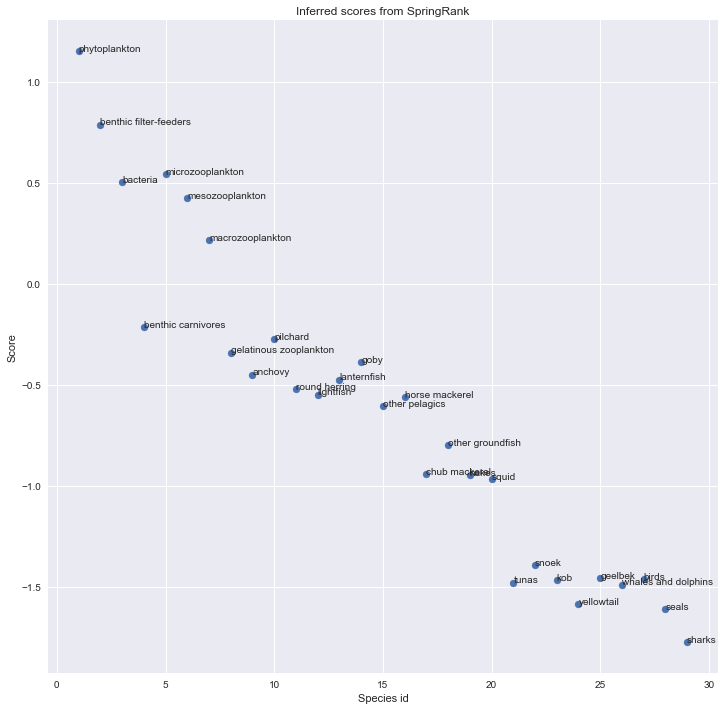

In [17]:
ax0, ax = plt.subplots(figsize=(12,12))
ax.scatter(x1, -y1);
plt.title('Inferred scores from SpringRank')
plt.xlabel('Species id')
plt.ylabel('Score')
for i, txt in enumerate(Data.values[0][1:]):
    ax.annotate(txt, (x1[i],- y1[i]))
# plt.savefig('images/sprank_benguela.png')

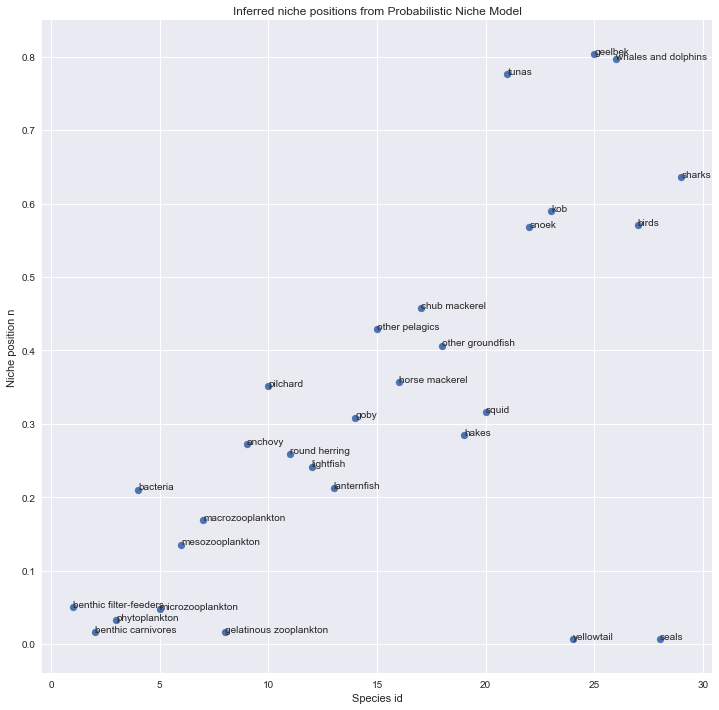

In [18]:
ax0, ax = plt.subplots(figsize=(12,12))
ax.scatter(x2, y2);
plt.title('Inferred niche positions from Probabilistic Niche Model');
plt.xlabel('Species id');
plt.ylabel('Niche position n');
for i, txt in enumerate(Data.values[0][1:]):
    ax.annotate(txt, (x2[i],y2[i]))
# plt.savefig('images/PNM_n_benguela.png')